In [1]:
# Code to read in integrals from the C++ created text file.

In [185]:
%pylab inline
import numpy as np
import csv
file_root='../CovMatricesAll/'
n=20;m=6;a=1.05

Populating the interactive namespace from numpy and matplotlib


In [186]:
def read_c_tot(n,m,file_root,a,suffix):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,suffix)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,suffix)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,suffix)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    c_tot=c4+a**2.*c2+a*c3
    return c_tot

In [188]:
c_indiv=[]
N_loops=100;
for i in range(N_loops):
    c_tmp=read_c_tot(n,m,file_root,a,str(i))
    c_indiv.append(c_tmp)

In [189]:
n_bins = n*m
n_l=float(N_loops)
tmp_sum=np.zeros_like(c_indiv[0])
for i in range(N_loops):
    excluded_mean=np.zeros_like(c_indiv[0])
    for j in range(N_loops):
        if i!=j:
            excluded_mean+=c_indiv[i]
    inv_excluded_mean=np.linalg.inv(excluded_mean/(n_l-1));
    tmp_sum+=inv_excluded_mean*c_indiv[i]
Dhat=(n_l-1)/n_l*(-1+1/n_l*tmp_sum)

In [190]:
Neff=1.+(n_bins+1.)/Dhat

In [201]:
tmp_sum2=0
for i in range(N_loops):
    tmp_sum2+=c_indiv[i]
c_mean=tmp_sum2/float(N_loops)

inv_c_tot=np.linalg.inv(c_tot)
inv_estimate=inv_c_tot#*(1.-Dhat)

In [202]:
samples=[]
for i in range(0,10)+range(50,60):
        for j in range(0,10)+range(50,60):
            if i==j: continue
            if inv_estimate[i,i]<=0.: continue
            if inv_estimate[j,j]<=0.: continue
            samples.append(inv_estimate[i,j]/np.sqrt(inv_estimate[i,i]*inv_estimate[j,j]))

In [203]:
np.std(samples)**(-2)+n_bins

1490.77074873559

In [194]:
c_tot=read_c_tot(n,m,file_root,a,'full')


In [195]:
precision_tot=np.linalg.inv(c_tot)

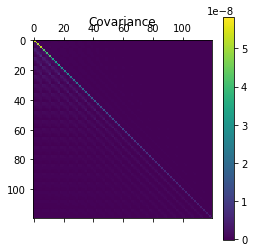

<Figure size 432x288 with 0 Axes>

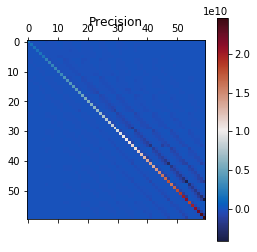

In [196]:
x_all=np.arange(0,len(c_tot))
import cmocean
X,X=np.meshgrid(x_all,x_all)
import matplotlib.pyplot as plt
cbar=cmocean.cm.balance
plt.matshow(c_tot)
maxval=min(np.abs(precision_tot.ravel()))
plt.title('Covariance')
plt.colorbar()
plt.figure();
plt.matshow(inv_estimate,cmap=cbar)#,vmin=-maxval,vmax=maxval)
plt.colorbar()
plt.title('Precision');